# Week 7 Notebook 2 Web Scraping

## Using Beautiful Soup
In this lesson, we are going to learn how to use the Beautiful Soup library to:
1. find data based on HTML tags
2. navigate an HTML document.

First, we have to import the `BeautifulSoup` module from the `bs4` library, which is already included in our Anaconda distribution. 

In [ ]:
# import the 'BeautifulSoup' module
from bs4 import BeautifulSoup

## Using the Requests Library
 
We can use the `Requests` library to send a `get` request to a web page. If the "content-type" of the response is HTML, we can create a `BeautifulSoup` object by parsing the content.

For example, we are going to send a request to the [Wikipedia page about the K-drama "Crash Landing on You"](https://en.wikipedia.org/wiki/Crash_Landing_on_You).

In [ ]:
import requests

response = requests.get("https://en.wikipedia.org/wiki/Crash_Landing_on_You")
print(response.status_code)

**Check Response Content Type**

If the response status is `200` which indicates success, we can check the content type by using the `headers` attribute of the `response` object.

In [ ]:
headers = response.headers
print(headers['content-type'])

**Create a BeautifulSoup Object**

Since it is HTML content, we can create a `BeautifulSoup` object by parsing the content.

In [ ]:
# create BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')
type(soup)

## Using a Downloaded HTML File

To avoid sending multiple `get` requests to the Wikipedia page, we can first download the HTML file. It has been downloaded and saved as "Crash-wiki.html".

First, we open the file for reading, then we can create a `BeautifulSoup` object by reading the file.

In [ ]:
# open the file
wiki_file = open("Crash-wiki.html", "r", encoding="utf-8")

# read the file as as BeautifulSoup object
soup = BeautifulSoup(wiki_file.read(), 'lxml')
type(soup)

As we can see, the process also returns a `bs4.BeautifulSoup` object. Now that it is a `BeautifulSoup` object, we can use the `BeautifulSoup` methods to further process the HTML.

For example, let's say we want to find the `<title>` tag. We can use the `find()` method.

In [ ]:
# find the FIRST <title> tag
title = soup.find('title')   
print(title)

**Printing Pretty HTML Format**

We can use the `prettify()` method to print the HTML tags in indented form. Take note of the first few tags, because this page is very long, the rest of the page may not be easy to read.

In [ ]:
print(soup.prettify())

**HTML Elements**

The `find()` method will find the first element of the specified tag. We can obtain more information about the found object.

In [ ]:
# find the first element of <title> tag
title = soup.find('title')
type(title)

We can see from the output that the element `type` is `Tag`. We can print various attributes of the `Tag` element.

In [ ]:
print(title.name)        # tag name
print(title.contents)    # tag contents
print(title.text)        # displayed text

As we can see, `title.contents` returns a List object, while `title.text` returns a string of text. 

Let's try to find another tag.

In [ ]:
# find the first element of <h1> tag
h1 = soup.find('h1')
h1

**Attributes**

We can see in the `<h1>` tag, there are two attributes: `class` and `id`. We can extract only the tag attributes using `attrs` attribute.

In [ ]:
# show the HTML attributes of <h1> tag
h1.attrs

It looks like the attributes are organised in a Dictionary object, so we can access the values by using the keys.

In [ ]:
# access the dictionary
print(h1['id'])
print(h1.get('id'))     # use the get() method with the attribute name
print(h1['class'])

**Find All Tags**

The `find()` method will find the first tag that matched the required value. To find ***all*** tags that match the value, we can use the `find_all()` method, which returns a List of all matched tags.

In [ ]:
# find all elements with <h2> tag
h2_tags = soup.find_all('h2')

# print the number of <h2> tags found
print(len(h2_tags))

There are 13 `<h2>` tags found. Let's try to print the first two.

In [ ]:
print(h2_tags[0])
print(h2_tags[1])

Using a loop, we can print the text from each of the `<h2>` tags found.

In [ ]:
# print the text from each of the <h2> tags
for tag in h2_tags:   
    print(tag.text)

**Another Example**

`find_all()` will be a convenient method to find all the hyperlinks that are available in an HTML page by searching for the `<a>`, or anchor, tags.

In [ ]:
links = soup.find_all('a')

print("Number of links found :", len(links))

print("First 5 links")
for link in links[:5]:
    print(link)        # the link text

**Finding by Attribute**

As we can see in the results above, not all the `<a>` tags have the same attributes. This can help us find the tags we want based on the attributes.

First, we can find tags based on attribute values.

In [ ]:
# retrieve elements with the attribute "id" equal to "Episodes"
tag = soup.find(id="Episodes")
print(tag)

We can also find tags based on whether the attribute is present. In the example below, first we find all the tags where the `class` attribute is equal to "tracklist". However, because `class` is a reserved word in Python, when we want to refer to the HTML attribute, we must add an underscore, hence it becomes `class_`.

Next, we will find all the results which have a `href` attribute by using `href=True`.

In [ ]:
# retrieve the element with the attribute 
# "class" equal to "tracklist"
tracks = soup.find_all(class_="tracklist")
for track in tracks:
    links=track.find_all(href=True)   # find the tracks which have a href attribute
    for link in links:
        print(link.text, link.get('href'))

# Navigating the HTML page

We can use the `BeautifulSoup` object to navigate the HTML tree. 

For example, let's say we want to access the following paragraph content.
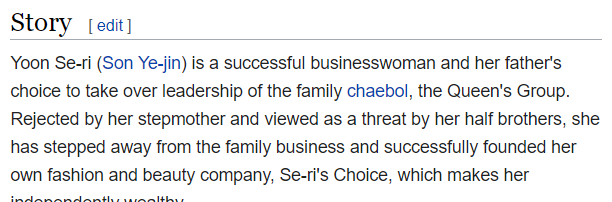

By inspecting the element, we can examine the tags to find how we can use our `BeautifulSoup` object to find the paragraph. The HTML tags for this paragraph are as follows:

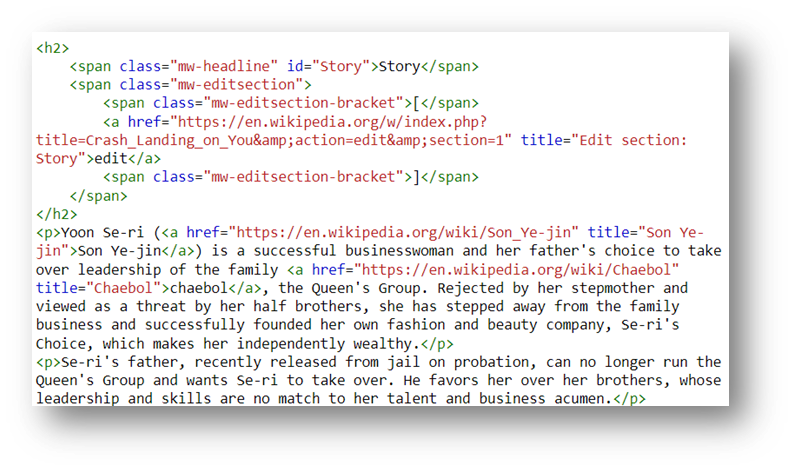

One identifying feature would be the `id = "Story"` attribute, as each `id` attribute must have a unique value in an HTML document. 

We will start by looking for the tags with the `id` attribute value of "Story".

In [ ]:
# find the tag with the id value "Story"
section = soup.find(id="Story")
print(section.name)

We have found the tag in the correct section, which is a `<span>` tag. However, the paragraph that we are looking for is on the same level as the `<h2>` tag, which means it is a `<h2>` tag sibling.

**Finding Parents**

We can also see that the `<h2>` tag is the `<span>` tag *parent* that we have found. So, we will have to navigate up by finding the parent of the current tag that we have found.

In [ ]:
# navigate to the parent
heading = section.find_parent()
print(heading.name)

**Finding Siblings**

Great! We have found the parent. Now that we know `<p>` is a sibling of `<h2>`, let's find the sibling of `<h2>` which is a `<p>` tag using the `find_next_sibling()` method.

In [ ]:
sibling = heading.find_next_sibling("p")
print(sibling.text)

Congratulations! We have found the paragraph that we were looking for. Finally, we also want to find the children of a tag.

**Finding Child Tags**

We can use `findChildren()` method to find the child tags. For example, let's go back and view the children of the `<h2>` tag that we found.

In [ ]:
h2_children = heading.findChildren()
print(h2_children)

A list of tags is returned. To view each element, we can use a `for` loop.

In [ ]:
# use for loop to print one per line
for child in h2_children:
    print(child)

# Exercises

Generally, we can perform web scraping by extracting the HTML code from a website, then navigating through the tags to find where the data is. Let's practice searching for more tags on this same site.

**Q1. Inspect & Find Tags**

Check the Crash Landing on You Wikipedia Page and inspect the element for the "Accolades" section!
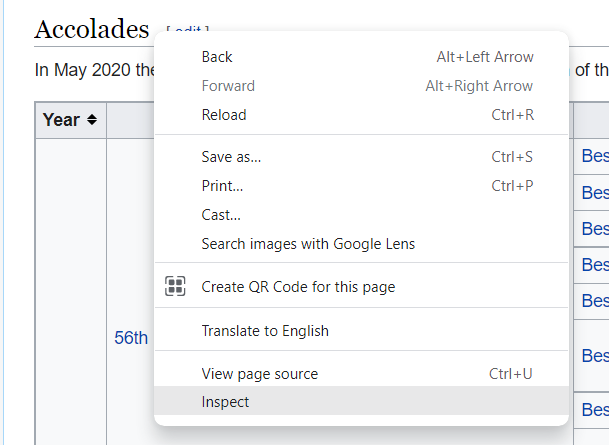

Then find the tag for this element using the appropriate argument using the `soup.find()` method!

In [ ]:
# Q1 Answer


**Q2. Find Parents**

Find the parent of this section!

In [ ]:
#Q2 Answer


**Q3. Find Siblings**

Find the table which is a sibling of the tag found in Q2.

In [ ]:
#Q3 Answer


**Q4. Scrape Hyperlinks**

Find all the hyperlinks within the table using `table.find_all()` and a suitable argument! Then print out the text of each hyperlink!

In [ ]:
#Q4 Answer


**Q5. Create BeautifulSoup Object**

Using the first hyperlink in the result of Q4, create a `BeautifulSoup` object called `award_soup` by sending a `get` request to the hyperlink!

In [ ]:
#Q5 Answer


**Q6. Validation**

Check that we have scraped the correct site by printing the text of the first `<title>` tag from `award_soup`!

In [ ]:
#Q6 Answer
